<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_06_Prueba_de_aleatoriedad_corrida_arriba_anajo_de_la_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Realizar prueba de estadística de aleatoriedad con corida arriba abajo de la media de una muestra de variable con valores numéricos.



# Cuestionamientos ...

* ¿En qué consiste la prueba?
* ¿Cómo se hace la prueba?
* ¿Qué significa e valor esperado de la corrida?
* ¿Qué significa la varianza y la desviación estándar de la corrida?
* ¿Cómo sería o cuál valor sería el nivel de confianza?
* ¿Cómo sería el valor de alfa?
* ¿Que significa declarar hipótesis nula y alterntiva para esta prueba?
* ¿Cómo se obtiene el estadístico de z de prueba? y ¿qué significa?
* ¿Contra qué se contrasta el estadstico de z de prueba?
* ¿Cómo se obtiene el p.valor?, y ¿qué significa?
* ¿Cómo po contra qué se contrasta el *p.valor*?






# Desarrollo

## Cargar librerías

In [209]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

## Ejempo de prueba arrib abajo


## Crear los datos

Pasos para prueba de aleatoriedad dde los datos:
* Se crean los datos,
* Se determina el valor de referencia que es la media aritmética de los datos,
* Luego, se inicializan las variables para cuantificar cuantos están por encima y por debajo de la media.
* Se hace un recorrido en los datos y se compara cuantos están por encima de la media y cuántos por debajo de éste valor de referencia.


In [210]:
# Paso 1: Tener tus datos
# datos = [80, 85, 90, 75, 78, 82, 87, 88, 92, 70]
datos = [41, 68, 89, 94, 74, 91, 55, 62, 36, 27,
         19 ,72, 75, 9, 54, 2, 1, 36, 16, 28,
         18, 1, 95, 69, 18, 47, 23, 32, 82, 53,
         31, 42, 73, 4, 83, 45, 13, 57, 63, 29]
print("Los datos:  \n" )
print(datos)

# Paso 2: Calcular el valor de referencia (media aritmética)  comparar
media = np.mean(datos)
print("La media artimética o valor de referencia de los datos es: ", media)

# Paso 3: Comparar y contar
arriba = 0
abajo = 0


for dato in datos:
  if dato > media:
    arriba += 1  # aquellos números por encima de la media n0
  if dato < media:
    abajo += 1   # aquellos números por debajo de a media n1
n1 = abajo
n0 = arriba
n = n0 + n1

print("Números por encima de la media: ", arriba, "n0:",n0," en la fórmula")
print("Números por debajo de la media: ", abajo, "n1:", n1," en la fórmula")
print ("Valor de n: ", n)



Los datos:  

[41, 68, 89, 94, 74, 91, 55, 62, 36, 27, 19, 72, 75, 9, 54, 2, 1, 36, 16, 28, 18, 1, 95, 69, 18, 47, 23, 32, 82, 53, 31, 42, 73, 4, 83, 45, 13, 57, 63, 29]
La media artimética o valor de referencia de los datos es:  45.675
Números por encima de la media:  19 n0: 19  en la fórmula
Números por debajo de la media:  21 n1: 21  en la fórmula
Valor de n:  40


## Prueba de arriba abajo
* Se hace la prueba de arriba-abajo


## Declarar hipótesis nula y alternaiva y valor de alfa 0.05
$$
H_0: \text{Los datos pasa la prueba de aleatoriedad arriba-abajo}
$$

$$
H_a: \text{Los datos no pasan la prueba de aleatoriedad arriba-abajo}
$$

$$
\text{nivel de confianza = 0.95}
$$

$$
\text{valor de alfa de significancia a una cola: } \alpha = (1 - 0.95) = 0.05
$$

$$
\text {si es a dos colas el valor de significancia es } \alpha /2 = 0.025
$$

In [211]:
# valor de alfa
confianza = 0.95
alfa = 1 - confianza
significancia = alfa/2

# Hipótesis nula y alternativa
H0 = "Los datos SI pasan la prueba de aleatoriedad arriba-abajo"
Ha = "Los datos NO pasan la prueba de aleatoriedad arriba-abajo"
print ("Valor de alfa a una cola", np.round(alfa, 4))
print("Valor de significancia de alfa a dos colas", np.round(significancia, 4))

Valor de alfa a una cola 0.05
Valor de significancia de alfa a dos colas 0.025


## Evaluar el p.valor


* Comparando contra el valor de alfa a una cola:
$$
Si (p.valor < alfa) \text{ se rechaza } H_0\text{ a una cola}
$$

$$
\text{de lo contrario Si}(p.valor >= alfa) \text{ se acepta } H_0
$$

* Comparando contra el valor de significancia de alfa a dos colas:

$$
Si (p.valor < significancia) \text{ se rechaza } H_0\text{ a dos colas}
$$

$$
\text{de lo contrario Si}(p.valor >= significancia) \text{ se acepta } H_0
$$


## Desarrollando el ejercicio
* Se utiliza la fórmula de valor esperado $\mu_{C_o}$,

* Luego la varianza $\sigma^2$,
* Luego determinar el estadístico de prueba $p$,
* A partir del estadístico de prueba se determina la probabilidad *p.valor* y con ello determinar si pasa o no pasa la prueba.



* El valor esperado $\mu$ de la corrida $C_o$
$$
\mu{C_o} = \frac{2\cdot n0\cdot n1}{n} + \frac{1}{2}
$$



In [212]:
valor_esperado = (2 * n0 * n1) / (n) + (1/2)
print("El valor esperado de la corrida es: ", valor_esperado)

El valor esperado de la corrida es:  20.45


* La varianza $\sigma^2$ de la corrida $C_o$

$$
\sigma^{2}{C_o} = \frac{2 \cdot n0 \cdot n1 \cdot (2\cdot n0 \cdot n1-n)}{n^2\cdot(n-1)}
$$

In [213]:
varianza = (2 * n0 * n1 * (2 * n0 * n1 - n)) / (n**2 * (n-1))
print("La varianza ", np.round(varianza, 6), "y la desviación estándar ", np.round(np.sqrt(varianza), 6))

La varianza  9.693654 y la desviación estándar  3.113463


* El valor de número de corridas

El valor de la cantidad de corridas es $C_o=19$ que significa el npumero de ocasiones que cambia de 0 a 1 y/o de 1 a 0 en las corridas de arriba abajo con respecto a le media.





In [214]:
# Determinando el número de corridas
corridas_valores = []   # se van a poner 0 y 1

# almacenar en un arreglo 0 cuando es meyor que la media; 1 cuando es menor que la media
for dato in datos:
  if dato > media:
    corridas_valores.append(0)
  else:
    corridas_valores.append(1)

print ("Corridas Valores con 0 y 1")
print(corridas_valores)

# Ahora la cantidad de corridas:
corridas = 1  # Se toma en cueta la primera corrida ya sea 0 o 1
for i in range(1, len(corridas_valores)):
  if corridas_valores[i] != corridas_valores[i - 1]:
    corridas += 1
print(datos)
print ("Número de corridas Co=", corridas)





Corridas Valores con 0 y 1
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
[41, 68, 89, 94, 74, 91, 55, 62, 36, 27, 19, 72, 75, 9, 54, 2, 1, 36, 16, 28, 18, 1, 95, 69, 18, 47, 23, 32, 82, 53, 31, 42, 73, 4, 83, 45, 13, 57, 63, 29]
Número de corridas Co= 19


* Ahora determinar el valor del estadístico. La diferencia de la cantidad de corridas menos el valor esperado divido entre la desviación estándar.

$$
\text{valor de prueba } ZC_o = \frac{(Co - \mu{C_o})}{\sqrt{\sigma^2}}=\frac{19-45.675}{\sqrt{9.693653}} = -0.14958
$$

* a dos colas el valor de z debe estar para aceptar hipótesis entre
$$
\text{z_critizo_izq}_{\alpha/2} \le \text{z_prueba} \le \text{z_critico_der}_{\alpha/2}
$$



In [215]:
z_prueba = (corridas - valor_esperado)/np.sqrt(varianza)
print ("El valor de z de prueba es: ", np.round(z_prueba, 6))
valor_critico_z_izq = norm.ppf(significancia)
valor_critico_z_der = norm.ppf(1 - significancia)
print("Valor de z a la izquierda", np.round(valor_critico_z_izq, 6))
print("Valor de z a la derecha", np.round(valor_critico_z_der, 6))


El valor de z de prueba es:  -0.465719
Valor de z a la izquierda -1.959964
Valor de z a la derecha 1.959964


## Visualizar una normal estandarizada

* Se genera una secuencia de números con valores mínimo y máximo de -3 a 3, mil valores.
* Se dibuja la densidad en color azul
* En color verde los valores críticos de z a la izquierda y a la derecha
* En color rojo el valor de z de prueba
* Las zonas de rechazo en color rojo tenue de H0

Si el valor de *z_prueba* está entre valores críticos de *z izquierda y derecha*,  
está en zona de aceptación de H0, por lo que se considera que la serie de datos
si cumple con la prueba de aleatoriedad arriba-abajo; de lo contrario, se rechaza H0.







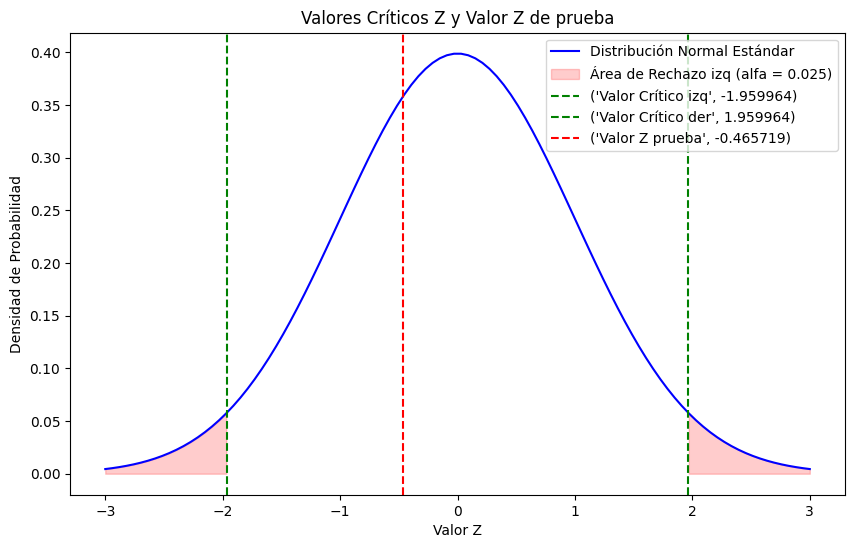

Se acepta Ho:  Los datos SI pasan la prueba de aleatoriedad arriba-abajo


In [216]:

x = np.linspace(-3, 3, 100)
# Crear una figura

plt.figure(figsize=(10, 6))

# Dibujar la distribución normal estándar
plt.plot(x, norm.pdf(x), label='Distribución Normal Estándar', color='blue')

# Área de rechazo por debajo del valor crítico izquierdo
plt.fill_between(x[x < valor_critico_z_izq], 0, norm.pdf(x[x < valor_critico_z_izq]), color='red', alpha=0.2, label=f'Área de Rechazo izq (alfa = {np.round(significancia, 4)})')

# Área de rechazo por encima del valor crítico derecho
plt.fill_between(x[x > valor_critico_z_der], 0, norm.pdf(x[x > valor_critico_z_der]), color='red', alpha=0.2)  # label=f'Área de Rechazo der (alfa = {significancia})')

# Dibujar el valor crítico Z
plt.axvline(x=valor_critico_z_izq, color='green', linestyle='--', label=('Valor Crítico izq', np.round(valor_critico_z_izq, 6)))
plt.axvline(x=valor_critico_z_der, color='green', linestyle='--', label=('Valor Crítico der', np.round(valor_critico_z_der, 6)))
# Dibujar el valor Z específico
plt.axvline(x=z_prueba, color='red', linestyle='--', label=('Valor Z prueba', np.round(z_prueba, 6)))


# Etiquetas y leyenda
plt.xlabel('Valor Z')
plt.ylabel('Densidad de Probabilidad')
plt.title('Valores Críticos Z y Valor Z de prueba')
plt.legend()

# Mostrar la gráfica
# plt.grid()
plt.show()

# Si el valor de z_prueba está entre valroes críticos izuierda y derecha
# está en zona de aceptación de H0 por lo que se considera que la serie de datos
# si cumple con la prueba de aleatoriedad arriba-abajo
if (valor_critico_z_izq <= z_prueba <= valor_critico_z_der ):
  print("Se acepta Ho: ", H0)
else:
  print("Se rechaza Ho: ", Ha)








## Calcualr el valor de p con base en el valor de z previaemnte calculado


In [217]:
# Calcular el p.valor
print ("Valor de z de prueba", np.round(z_prueba, 6))
# Calcular el valor p usando la CDF de la distribución normal estándar
p_valor = norm.cdf(z_prueba)
print("El valor del estadístico p.valor es:", np.round(p_valor, 6), "que se compara contra el valor del significancia de alfa")

# Evaluando a una cola contra el valor alfa
if p_valor < alfa:
  print ("A una cola: Se rechaza H0: y se acepta Ha", Ha)
else:
  print ("A una cola: Se acepta H0: ",  H0)


# Evaluando a dos colas con el valor de significancia alfa/2
if p_valor < significancia:
  print ("A dos colas: Se rechaza H0: y se acepta Ha", Ha)
else:
  print ("A dos colas: Se acepta H0: ",  H0)




Valor de z de prueba -0.465719
El valor del estadístico p.valor es: 0.320708 que se compara contra el valor del significancia de alfa
A una cola: Se acepta H0:  Los datos SI pasan la prueba de aleatoriedad arriba-abajo
A dos colas: Se acepta H0:  Los datos SI pasan la prueba de aleatoriedad arriba-abajo


# Simular con otros datos


Los datos:  

[8, 9, 9, 9, 8, 9, 8, 7, 8, 7, 9, 8, 7, 8, 9, 7, 8, 7, 8, 9, 10, 15, 12, 13, 9, 11, 14, 10, 15, 12, 13, 9, 11, 14, 10, 15, 12, 13, 9, 11]
La media artimética o valor de referencia de los datos es:  10.0
Números por encima de la media:  14 n0: 14  en la fórmula
Números por debajo de la media:  23 n1: 23  en la fórmula
Valor de n:  37
El valor esperado de la corrida es:  17.905405405405407


La varianza y la desviación estándar
La varianza  7.931743 y la desviación estándar  2.816335


La cantidad de corridas
Corridas Valores con 0 y 1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[8, 9, 9, 9, 8, 9, 8, 7, 8, 7, 9, 8, 7, 8, 9, 7, 8, 7, 8, 9, 10, 15, 12, 13, 9, 11, 14, 10, 15, 12, 13, 9, 11, 14, 10, 15, 12, 13, 9, 11]
Número de corridas Co= 12


El valor de z de prueba es:  -2.096841
Valor de z a la izquierda -1.959964
Valor de z a la derecha 1.959964


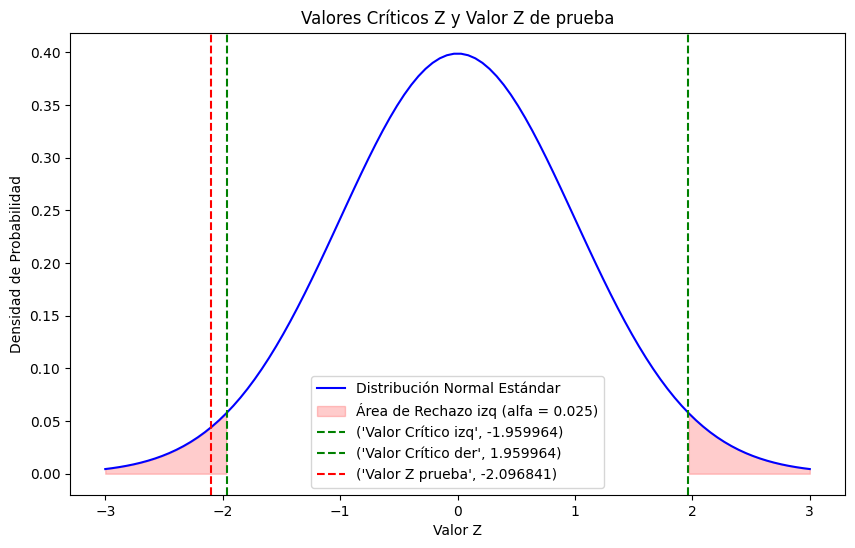

Se rechaza Ho:  Los datos NO pasan la prueba de aleatoriedad arriba-abajo


Valor de z de prueba -2.096841
El valor del estadístico p.valor es: 0.018004 que se compara contra el valor del significancia de alfa
A una cola: Se rechaza H0: y se acepta Ha Los datos NO pasan la prueba de aleatoriedad arriba-abajo
A dos colas: Se rechaza H0: y se acepta Ha Los datos NO pasan la prueba de aleatoriedad arriba-abajo


In [218]:
# paso 1: simulando los datos, son otros datos
otros_datos = [8, 9, 9, 9, 8, 9, 8, 7, 8, 7, 9, 8, 7, 8, 9, 7, 8, 7, 8, 9,10, 15, 12, 13, 9, 11, 14, 10, 15, 12, 13, 9, 11, 14, 10, 15, 12, 13, 9, 11]
datos = otros_datos

print("Los datos:  \n" )
print(datos)

# Paso 2: Calcular el valor de referencia (media aritmética)  comparar
media = np.mean(datos)
print("La media artimética o valor de referencia de los datos es: ", media)

# Paso 3: Comparar y contar para determinar valores de n0 y n1
arriba = 0
abajo = 0

for dato in datos:
  if dato > media:
    arriba += 1  # aquellos números por encima de la media n0
  if dato < media:
    abajo += 1   # aquellos números por debajo de a media n1
n1 = abajo
n0 = arriba
n = n0 + n1

print("Números por encima de la media: ", arriba, "n0:",n0," en la fórmula")
print("Números por debajo de la media: ", abajo, "n1:", n1," en la fórmula")
print ("Valor de n: ", n)

# Paso 4: Calculando el valor esperado
valor_esperado = (2 * n0 * n1) / (n) + (1/2)
print("El valor esperado de la corrida es: ", valor_esperado)
print("\n")

# Paso 5: La varianza y la desviación estándar
print("La varianza y la desviación estándar")
varianza = (2 * n0 * n1 * (2 * n0 * n1 - n)) / (n**2 * (n-1))
varianza = (2 * n0 * n1 * (2 * n0 * n1 - n)) / (n**2 * (n-1))
print("La varianza ", np.round(varianza, 6), "y la desviación estándar ", np.round(np.sqrt(varianza), 6))

# Paso 6: cantidad de corridas
print("\n")
print("La cantidad de corridas")

# Determinano la cantidad de corridas
# Determinando el número de corridas
corridas_valores = []   # se van a poner 0 y 1

# almacenar en un arreglo 0 cuando es meyor que la media; 1 cuando es menor que la media
for dato in datos:
  if dato > media:
    corridas_valores.append(0)
  else:
    corridas_valores.append(1)

print ("Corridas Valores con 0 y 1")
print(corridas_valores)

# Ahora la cantidad de corridas:
corridas = 1  # Se toma en cueta la primera corrida ya sea 0 o 1
for i in range(1, len(corridas_valores)):
  if corridas_valores[i] != corridas_valores[i - 1]:
    corridas += 1
print(datos)
print ("Número de corridas Co=", corridas)
print("\n")

# Paso 7:valor de z de prueba
z_prueba = (corridas - valor_esperado)/np.sqrt(varianza)
print ("El valor de z de prueba es: ", np.round(z_prueba, 6))
valor_critico_z_izq = norm.ppf(significancia)
valor_critico_z_der = norm.ppf(1 - significancia)
print("Valor de z a la izquierda", np.round(valor_critico_z_izq, 6))
print("Valor de z a la derecha", np.round(valor_critico_z_der, 6))

# Paso 8: visualizar z de prueba y compar contra valores críticos izquierda y derecha
x = np.linspace(-3, 3, 100)
# Crear una figura

plt.figure(figsize=(10, 6))

# Dibujar la distribución normal estándar
plt.plot(x, norm.pdf(x), label='Distribución Normal Estándar', color='blue')

# Área de rechazo por debajo del valor crítico izquierdo
plt.fill_between(x[x < valor_critico_z_izq], 0, norm.pdf(x[x < valor_critico_z_izq]), color='red', alpha=0.2, label=f'Área de Rechazo izq (alfa = {np.round(significancia, 4)})')

# Área de rechazo por encima del valor crítico derecho
plt.fill_between(x[x > valor_critico_z_der], 0, norm.pdf(x[x > valor_critico_z_der]), color='red', alpha=0.2)  # label=f'Área de Rechazo der (alfa = {significancia})')

# Dibujar el valor crítico Z
plt.axvline(x=valor_critico_z_izq, color='green', linestyle='--', label=('Valor Crítico izq', np.round(valor_critico_z_izq, 6)))
plt.axvline(x=valor_critico_z_der, color='green', linestyle='--', label=('Valor Crítico der', np.round(valor_critico_z_der, 6)))
# Dibujar el valor Z específico
plt.axvline(x=z_prueba, color='red', linestyle='--', label=('Valor Z prueba', np.round(z_prueba, 6)))


# Etiquetas y leyenda
plt.xlabel('Valor Z')
plt.ylabel('Densidad de Probabilidad')
plt.title('Valores Críticos Z y Valor Z de prueba')
plt.legend()

# Mostrar la gráfica
# plt.grid()
plt.show()

# Si el valor de z_prueba está entre valroes críticos izuierda y derecha
# está en zona de aceptación de H0 por lo que se considera que la serie de datos
# si cumple con la prueba de aleatoriedad arriba-abajo
if (valor_critico_z_izq <= z_prueba <= valor_critico_z_der ):
  print("Se acepta Ho: ", H0)
else:
  print("Se rechaza Ho: ", Ha)

# Paso 10: Calcular p_valor y comparar p_valor contra el valor de significancia alfa / 2

print("\n")
# Calcular el p.valor
print ("Valor de z de prueba", np.round(z_prueba, 6))
# Calcular el valor p usando la CDF de la distribución normal estándar
p_valor = norm.cdf(z_prueba)
print("El valor del estadístico p.valor es:", np.round(p_valor, 6), "que se compara contra el valor del significancia de alfa")

# Evaluando a una cola contra el valor alfa
if p_valor < alfa:
  print ("A una cola: Se rechaza H0: y se acepta Ha", Ha)
else:
  print ("A una cola: Se acepta H0: ",  H0)

# Evaluando a dos colas con el valor de significancia alfa/2
if p_valor < significancia:
  print ("A dos colas: Se rechaza H0: y se acepta Ha", Ha)
else:
  print ("A dos colas: Se acepta H0: ",  H0)


# Interpretación

cuestionamiemtos iniciales:

* ¿En qué consiste la prueba?
* ¿Cómo se hace la prueba?
* ¿Qué significa e valor esperado de la corrida?
* ¿Qué significa la varianza y la desviación estándar de la corrida?
* ¿Cómo sería o cuál valor sería el nivel de confianza?
* ¿Cómo sería el valor de alfa?
* ¿Que significa declarar hipótesis nula y alterntiva para esta prueba?
* ¿Cómo se obtiene el estadístico de z de prueba? y ¿qué significa?
* ¿Contra qué se contrasta el estadstico de z de prueba?
* ¿Cómo se obtiene el p.valor?, y ¿qué significa?
* ¿Cómo po contra qué se contrasta el *p.valor*?
Pendiente, se requiere al menos 100 palabras sobre el significado del caso y lo aprendido